# 聚类

将网络表示学习结果用于指导论文聚类。

## 导入依赖


In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from mpl_toolkits.mplot3d import Axes3D


## 限定文件目录

In [75]:
dir_emb = "./data/aan/aan_node2vec.emb"
dir_data = "./data/aan/aan.csv"

## 读入文件

In [62]:
col_name = ['paper_id']
for i in range(128):
    col_name += ['vec:'+str(i+1)]
vectors = pd.read_csv(dir_emb,sep=' ',names = col_name)

In [63]:
vectors = vectors.drop(0)

In [64]:
vectors.index = vectors['paper_id']

In [65]:
vectors = vectors.drop(['paper_id'],axis=1)

In [66]:
paper_id = list(vectors.index)
X = np.array(vectors)
inertias = []
distances = []
def calculate_distance(array_1,array_2):
    dist = 0.0
    for vec_1 in array_1:
        for vec_2 in array_2:
            dist += ((vec_2 - vec_1) * (vec_2 - vec_1)).sum()
    return dist

for i in range(2,20):
    kmeans = KMeans(n_clusters = i,random_state=99)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    distances.append(calculate_distance(kmeans.cluster_centers_,kmeans.cluster_centers_))


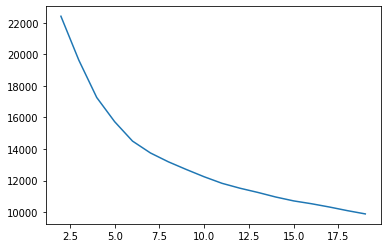

In [67]:
plt.plot(range(2,20),inertias)

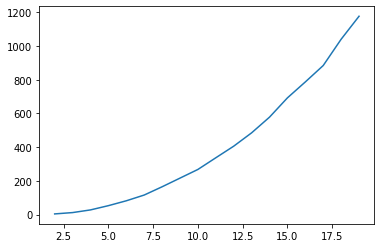

In [68]:
plt.plot(range(2,20),distances)

最终确定 $ k=6 $

<ipython-input-69-e2b0626ae29a>:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


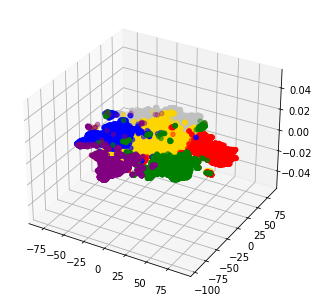

In [69]:
kmeans = KMeans(n_clusters=6, random_state=99)
kmeans.fit(X)

i = 0; color = ['red','green','blue','purple','gold','silver']

tsne = TSNE(n_components=2,init="pca",n_jobs=-1)
tsne.fit_transform(X)

result = pd.DataFrame(tsne.embedding_)
result['clu_group'] = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)

for label in pd.Series(kmeans.labels_).unique():
    data_plot = result[result['clu_group']==label]
    ax.scatter(data_plot[0],data_plot[1],color=color[i]);i+=1

In [70]:
kmeans.labels_

array([2, 2, 2, ..., 4, 4, 4])

In [71]:
for x,y in zip(np.array(paper_id),kmeans.labels_):
    print(x,y)
    break

3915 2


In [72]:
paper_cluster = dict()
for x,y in zip(np.array(paper_id),kmeans.labels_):
    paper_cluster[str(x)] = str(y)

In [76]:
df = pd.read_csv(dir_data,header=0)

In [82]:
def get_cluster(x,cluster_dict):
    if str(x) in cluster_dict.keys():
        return cluster_dict[str(x)]
    else:
        return 'U'

df['cluster'] = df['paper_id'].apply(get_cluster,cluster_dict=paper_cluster)

In [84]:
df['dbname'] = 'aan'
df.to_csv('./data/aan/aan_final.csv',index=False)

In [90]:
nodes = pd.read_csv('./data/aan/aan_node_id.csv',usecols=['id','node_name','node_type','dbname'])

In [91]:
nodes['node_cluster'] = nodes['id'].apply(get_cluster,cluster_dict=paper_cluster)

In [1]:
nodes.to_csv('./data/aan/aan_node_id.csv',index=False)

NameError: name 'nodes' is not defined

In [2]:
a = [1,2,3,4]
a[:3]

[1, 2, 3]